In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mab.mab import UCB

In [105]:
class UCB:

    def __init__(self, n_arms, args=None):

        # bandit stuff
        self.n_arms = n_arms
        self.means = np.zeros(n_arms)
        self.occurences = np.zeros(n_arms)
        self.f = lambda t: 1 + t * np.log(t) ** 2
        self.t = 0

        # misc
        self.args = args

    def sample(self):
        """
        Samples an arm
        """

        # if we tried all arms at least once
        if self.t >= self.n_arms:
            confidence_bounds = self.compute_confidences()
            # print(confidence_bounds)
            i = np.argmax(confidence_bounds)
        else:
            i = self.t
        self.t += 1

        return i
    
    def compute_confidences(self):
        """
        Computes confidence bounds
        """
        return self.means + np.sqrt(2 * np.log(self.f(self.t)) / self.occurences)
    
    def update_arm(self, i, score):
        """
        Updates the averages and confidence bounds
        """
        self.occurences[i] += 1
        self.means[i] = (self.means[i] * (self.occurences[i] - 1) + score) / self.occurences[i]


Best arm: 2
Means:  [ 303.95276505  965.50905191 1537.84383735  920.5738494   244.58359696]
Scales:  [1. 1. 1. 1. 1.]
Confidences:  [ 308.36405849  969.27032665 1538.25871674  923.44431465  246.16586905]
Averages:  [ 304.44998111  965.35624927 1537.85923789  919.53023727  242.25179168]


(array([ 1.,  0.,  1.,  0.,  0., 96.,  0.,  1.,  0.,  1.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

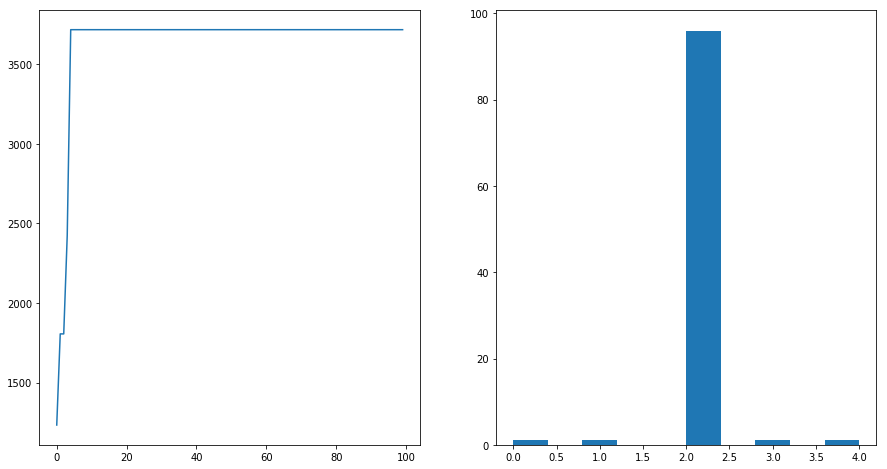

In [120]:
n_arms = 5

means = np.random.normal(loc=1000, scale=500, size=n_arms)
scales = np.ones(n_arms) * 1
best_arm = np.argmax(means)
print("Best arm: {}".format(best_arm))
print("Means: ", means)
print("Scales: ", scales)

regrets = []
arms = []
ucb = UCB(n_arms=n_arms)
for i in range(100):
    # print(ucb.compute_confidences())
    arm = ucb.sample()
    # print(arm)
    obs = np.random.normal(loc=means[arm], scale=scales[arm])
    ucb.update_arm(arm, obs)
    regrets.append(means[best_arm] - means[arm])
    arms.append(arm)
    
print("Confidences: ", ucb.compute_confidences())
print("Averages: ", ucb.means)
plt.figure(figsize=(15, 8))
plt.subplot(121)
plt.plot(np.cumsum(regrets))
plt.subplot(122)
plt.hist(arms)